In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [2]:
df1 = pd.read_csv('indeed_da_raw.csv')
df2 = pd.read_csv('indeed_ml_engineer_raw.csv')
df3 = pd.read_csv('internshala_raw.csv')
df4 = pd.read_csv('naukri_da_raw.csv')
df5 = pd.read_csv('naukri_ml_raw.csv')

## Handle indeed DA data

In [3]:
df1['job_description'] = df1[df1.columns[6:11]].apply(lambda x: ','.join(x.fillna('missing').astype(str)), axis=1)
df1.drop(df1.columns[6:11], axis =1, inplace = True)
df1.drop(df1.columns[7:-1], axis =1, inplace = True)
df1.drop(['attribute_snippet', 'ialbl'], axis =1, inplace = True)
df1['source'] = 'Indeed'
df1.dropna(inplace = True)
df1.rename({'jcs-JobTitle href':'job_link', 'jcs-JobTitle': 'job_title', 'companyName': 'company_name', 'companyLocation': 'job_location', 'date':'posted_on'}, axis =1, inplace = True)
df1.head()


,job_link,job_title,company_name,job_location,posted_on,job_description,source
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Web Analyst,NxtWave Disruptive Technologies Private Limited,"Hyderabad, Telangana",30+ days ago,Processing confidential and information accor...,Indeed
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,Book-keeping and Data Analyst,NORWOOD INN & SUITES,"Remote in Surat, Gujarat",Today,"Must have worked in office, analyzing or acco...",Indeed
3,https://in.indeed.com/company/Smart-Moves/jobs...,Data Analyst,Smart Moves,"Chennai, Tamil Nadu",Active 21 days ago,"4.Other Financial related activities.,Total wo...",Indeed
4,https://in.indeed.com/rc/clk?jk=1c19968419f674...,Data Analyst - Intern (Remote/Gurgaon),Tealfeed,"Remote in Gurgaon, Haryana",5 days ago,You will be responsible for managing our maste...,Indeed
5,https://in.indeed.com/company/Fluidonomics-Sol...,Data Research Analyst,Fluidonomics Solutions LLP,"Pune, Maharashtra",4 days ago,1+ years’ work experience with proven knowledg...,Indeed


## Handle indeed ML data

In [4]:
df2['job_description'] = df2[['job-snippet', 'job-snippet 2', 'job-snippet 3']].apply(lambda x: ','.join(x.fillna('missing').astype(str)), axis=1) # job descriptions
df2.drop(df2.columns[7:-1], axis =1, inplace = True)
df2['source'] = 'Indeed'
df2.drop(['job-snippet', 'job-snippet 2'], axis = 1, inplace = True)
df2.rename({'jcs-JobTitle href':'job_link', 'jcs-JobTitle': 'job_title', 'companyName': 'company_name', 'companyLocation': 'job_location', 'date':'posted_on'}, axis =1, inplace = True)
df2.dropna(inplace = True)
df2.head()

,job_link,job_title,company_name,job_location,posted_on,job_description,source
0,https://in.indeed.com/company/Takeleap-tech-pv...,Jr ML Engineer,Takeleap tech pvt ltd,"J.P. Nagar, 3rd Phase, Karnataka",18 days ago,""" Work with other machine learning scientists ...",Indeed
2,https://in.indeed.com/company/Takeleap-tech-pv...,Sr ML Engineer,Takeleap tech pvt ltd,"J.P. Nagar, 3rd Phase, Karnataka",18 days ago,""" Work with other machine learning scientists ...",Indeed
4,https://in.indeed.com/rc/clk?jk=d10940caf9a8af...,Applied ML engineer,sybill,"Bengaluru, Karnataka",30+ days ago,"3+ years of experience as an , data scientist...",Indeed
5,https://in.indeed.com/company/Techneplus/jobs/...,AI / ML Engineer,Techneplus,"Chennai, Tamil Nadu",Today,We are looking for a highly capable machine le...,Indeed
6,https://in.indeed.com/company/nexhs-renewables...,AI Engineer,NeXHS Renewables Pvt. Ltd.,"Chennai, Tamil Nadu",25 days ago,You thrive in fast-moving environments where y...,Indeed


## Handle internshala data

In [5]:
df3.rename({'heading_4_5 href':'job_link', 'heading_4_5': 'job_title', 'link_display_like_text': 'company_name', 'location_link': 'job_location', \
    'label_container':'scope', 'item_body': 'duration'}, axis =1, inplace = True)
df3.drop(['link_display_like_text href', 'internship_logo src', 'location_link href', 'start_immediately_mobile',\
     'start_immediately_desktop', 'item_body 2'], axis =1, inplace=True)
df3.head()

,job_title,job_link,company_name,job_location,duration,stipend,scope
0,Business Analytics,https://internshala.com/internship/detail/busi...,Gaussian Networks Private Limited,Gurgaon,3 Months,15000 /month,Internship
1,Python Data Engineering,https://internshala.com/internship/detail/pyth...,Aramse Technologies Private Limited,Bangalore,6 Months,18000-25000 /month,Internship
2,Data Analytics Assistance,https://internshala.com/internship/detail/data...,Cashcow Consulting Private Limited,Mumbai,1 Month,10000 /month,Internship with job offer
3,Data Analysis,https://internshala.com/internship/detail/data...,FinTECH Bulls LLC,Delhi,6 Months,10000 /month,Internship
4,Operations,https://internshala.com/internship/detail/oper...,Paragraph Technologies Private Limited,Work From Home,6 Months,6000 /month,Internship with job offer


## Handle Naukri DA data

In [6]:
df4['job_description'] = df4[df4.columns[9:17]].apply(lambda x: ','.join(x.fillna('missing').astype(str)), axis=1)
df4['source'] = 'Naukri'
df4.rename({'title href':'job_link', 'title': 'job_title', 'subTitle': 'company_name',\
     'ellipsis 3': 'job_location', 'fleft 9':'posted_on'}, axis =1, inplace = True)

df4.drop(['subTitle href', 	'starRating', 'reviewsCount href', 'expe', 'ellipsis 2', 'job-description',	'fleft',	\
    'fleft 2',	'fleft 3', 	'fleft 4', 	'fleft 5',	'fleft 6',	'fleft 7',	'fleft 8',	'fleft 10'], axis =1, inplace = True)

df4.head()

,job_title,job_link,company_name,job_location,posted_on,job_description,source
0,Senior Data Analyst,https://www.naukri.com/job-listings-senior-dat...,Flipkart,Bangalore/Bengaluru,5 Days Ago,Experience in handling large data volumes. Str...,Naukri
1,Senior Data Analyst - SQL Tableau & Alteryx,https://www.naukri.com/job-listings-senior-dat...,Optum,Hyderabad/Secunderabad,3 Days Ago,Combine two of the fastest-growing fields on t...,Naukri
2,"Senior Data Analyst - Python, SQL",https://www.naukri.com/job-listings-senior-dat...,Optum,Hyderabad/Secunderabad,3 Days Ago,Self-driven and able to work independently wit...,Naukri
3,Principal Data Analyst I,https://www.naukri.com/job-listings-principal-...,Invesco (India) Pvt Ltd,Hyderabad/Secunderabad,1 Day Ago,JOB TITLE: PRINCIPAL DATA ANALYST 1JOB PURPOSE...,Naukri
4,Lead Data Analyst - Risk Analytics,https://www.naukri.com/job-listings-lead-data-...,Gojek,Bangalore/Bengaluru,3 Days Ago,"PhD, Master s or Bachelor s degree in Quantita...",Naukri


## Handle Naukri ML data


In [7]:
df5['job_description'] = df5[df5.columns[9:17]].apply(lambda x: ','.join(x.fillna('missing').astype(str)), axis=1)
df5['source'] = 'Naukri'
df5.rename({'title href':'job_link', 'title': 'job_title', 'subTitle': 'company_name',\
     'ellipsis 3': 'job_location', 'fleft 9':'posted_on'}, axis =1, inplace = True)

df5.drop(['subTitle href', 	'starRating', 'reviewsCount href', 'expe', 'ellipsis 2', 'job-description',	'fleft',	\
    'fleft 2',	'fleft 3', 	'fleft 4', 	'fleft 5',	'fleft 6',	'fleft 7',	'fleft 8',	'fleft 10'], axis =1, inplace = True)

df5.head()

,job_title,job_link,company_name,job_location,posted_on,job_description,source
0,ML Engineer,https://www.naukri.com/job-listings-ml-enginee...,CarDekho,Gurgaon/Gurugram,10 Days Ago,Good understanding of computer science fundame...,Naukri
1,ML Engineer - NLP,https://www.naukri.com/job-listings-ml-enginee...,"Avoma, Inc.",Pune,2 Days Ago,At Avoma you will: Improve Avoma s Insights En...,Naukri
2,ML Engineer,https://www.naukri.com/job-listings-ml-enginee...,CHANGE LEADERS CONSULTING,Bangalore/Bengaluru,7 Days Ago,5+ years hands-on experience in building analy...,Naukri
3,Ml Engineer,https://www.naukri.com/job-listings-ml-enginee...,Exceed Management Pvt Ltd.,Hyderabad/Secunderabad,3 Days Ago,Job Responsibilities Rapid prototyping & short...,Naukri
4,ML Engineer,https://www.naukri.com/job-listings-ml-enginee...,Acme Services,Mumbai,2 Days Ago,Familiarity with Linux & Ability to select har...,Naukri


## Combining all Full-time Job Data (i.e. except Internshala data combine everything)

In [8]:
final_df = pd.concat([df1, df2, df4, df5], ignore_index=True, sort=False)
final_df.head()

,job_link,job_title,company_name,job_location,posted_on,job_description,source
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Web Analyst,NxtWave Disruptive Technologies Private Limited,"Hyderabad, Telangana",30+ days ago,Processing confidential and information accor...,Indeed
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,Book-keeping and Data Analyst,NORWOOD INN & SUITES,"Remote in Surat, Gujarat",Today,"Must have worked in office, analyzing or acco...",Indeed
2,https://in.indeed.com/company/Smart-Moves/jobs...,Data Analyst,Smart Moves,"Chennai, Tamil Nadu",Active 21 days ago,"4.Other Financial related activities.,Total wo...",Indeed
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,Data Analyst - Intern (Remote/Gurgaon),Tealfeed,"Remote in Gurgaon, Haryana",5 days ago,You will be responsible for managing our maste...,Indeed
4,https://in.indeed.com/company/Fluidonomics-Sol...,Data Research Analyst,Fluidonomics Solutions LLP,"Pune, Maharashtra",4 days ago,1+ years’ work experience with proven knowledg...,Indeed


In [9]:
python_ = []
for i in final_df.job_description.str.split():
        if 'python' in i or 'Python' in i:
            python_.append(1)
        else:
            python_.append(0) 

len(python_), final_df.shape[0]

(3113, 3113)

In [10]:
def skills(df, keyword1 = 'None', keyword2 = 'None', keyword3 = 'None'):

    list_ = []
    for i in df['job_description'].str.lower().str.split():
        if keyword1.lower() in i or keyword2.lower() in i or keyword3.lower() in i:
            list_.append(1)
        else:
            list_.append(0)
    return list_



final_df['excel'] = skills(final_df, 'excel', 'macros', 'vba')
final_df['python'] = skills(final_df, 'Python')
final_df['ML'] = skills(final_df, 'ml', 'machine')
final_df['SQL'] = skills(final_df, 'SQL')
final_df['R_language'] = skills(final_df, 'R')
final_df['statistics'] = skills(final_df, 'Statistics')
final_df['NLP'] = skills(final_df, 'nlp')
final_df['BI tools'] = skills(final_df, 'tableau', 'powerbi', 'power')

final_df.head()

,job_link,job_title,company_name,job_location,posted_on,job_description,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Web Analyst,NxtWave Disruptive Technologies Private Limited,"Hyderabad, Telangana",30+ days ago,Processing confidential and information accor...,Indeed,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,Book-keeping and Data Analyst,NORWOOD INN & SUITES,"Remote in Surat, Gujarat",Today,"Must have worked in office, analyzing or acco...",Indeed,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,Data Analyst,Smart Moves,"Chennai, Tamil Nadu",Active 21 days ago,"4.Other Financial related activities.,Total wo...",Indeed,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,Data Analyst - Intern (Remote/Gurgaon),Tealfeed,"Remote in Gurgaon, Haryana",5 days ago,You will be responsible for managing our maste...,Indeed,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,Data Research Analyst,Fluidonomics Solutions LLP,"Pune, Maharashtra",4 days ago,1+ years’ work experience with proven knowledg...,Indeed,0,0,0,0,0,0,0,0


In [11]:
final_df.to_csv('cleaned_data_for_excel.csv', index = False)

## Importing data again after cleaning in Excel 

In [12]:
final_df = pd.read_csv('cleaned_data.csv')
useful_cols = [col for col in final_df.columns if col not in ['job_link', 'job_description']]
final_df.head()

,job_link,job_title,company_name,city,state,posted_on (days ago),job_description,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Web Analyst,NxtWave Disruptive Technologies Private Limited,"Hyderabad, Telangana",Telangana,30,Processing confidential and information accor...,Indeed,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,Book-keeping and Data Analyst,NORWOOD INN & SUITES,"Remote in Surat, Gujarat",Gujarat,0,"Must have worked in office, analyzing or acco...",Indeed,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,Data Analyst,Smart Moves,Chennai,Tamil Nadu,21,"4.Other Financial related activities.,Total wo...",Indeed,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,Data Analyst - Intern (Remote/Gurgaon),Tealfeed,"Remote in Gurgaon, Haryana",Haryana,5,You will be responsible for managing our maste...,Indeed,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,Data Research Analyst,Fluidonomics Solutions LLP,"Pune, Maharashtra",Maharashtra,4,1+ years’ work experience with proven knowledg...,Indeed,0,0,0,0,0,0,0,0


In [13]:
for i in final_df[useful_cols].columns:
    print("Column: ", i)
    print("First 5 unique values: ", final_df[i].unique()[:5])
    print("Number of Unique Values: ", final_df[i].nunique())
    print(f"Top 5 Values: \n{final_df[i].value_counts().head()}")
    print('\n')
    print('='*100)
    print('\n')

Column:  job_title
First 5 unique values:  ['Web Analyst' 'Book-keeping and Data Analyst' 'Data Analyst'
 'Data Analyst - Intern (Remote/Gurgaon)' 'Data Research Analyst']
Number of Unique Values:  1443
Top 5 Values: 
Data Analyst             554
Data Scientist            90
Senior Data Analyst       83
ML Engineer               28
Senior Data Scientist     27
Name: job_title, dtype: int64




Column:  company_name
First 5 unique values:  ['NxtWave Disruptive Technologies Private Limited' 'NORWOOD INN & SUITES'
 'Smart Moves' 'Tealfeed' 'Fluidonomics Solutions LLP']
Number of Unique Values:  1438
Top 5 Values: 
Accenture                    179
Huquo Consulting Pvt. Ltd     63
IBM                           40
Optum                         37
PayPal                        35
Name: company_name, dtype: int64




Column:  city
First 5 unique values:  ['Hyderabad, Telangana' 'Remote in Surat, Gujarat' 'Chennai'
 'Remote in Gurgaon, Haryana' 'Pune, Maharashtra']
Number of Unique Values:  192

In [14]:
final_df.job_title.unique()

array(['Web Analyst', 'Book-keeping and Data Analyst', 'Data Analyst',
       ..., 'Big Data Developer - SE/SSE',
       'CGI is Hiring For Data Engineer with Kafka developer.',
       'Data Analyst Contractor'], dtype=object)

### Data Analyst job by State

In [15]:
# State-wise job-openning
data_analyst_data = final_df.query('"data analyst" in job_title.str.lower()')
data_analyst_data[useful_cols].groupby('state').count()[['job_title']].sort_values(by = 'job_title', ascending= False).style.background_gradient('magma_r')

,job_title
state,
Karnataka,181
Maharashtra,88
Haryana,62
Tamil Nadu,48
Telangana,40
Multiple Locations,35
Delhi,25
Uttar Pradesh,18
Gujarat,16


## ML engineer jobs by state

In [16]:
# State-wise job-openning
ml_engg_data = final_df.query('"ml engineer" in job_title.str.lower()')
ml_engg_data[useful_cols].groupby('state').count()[['job_title']].sort_values(by = 'job_title', ascending= False).style.background_gradient('magma_r')

,job_title
state,
Karnataka,10
Maharashtra,5
Telangana,4
Haryana,3
Multiple Locations,2
Tamil Nadu,2
Andhra Pradesh,1
Chandigarh,1
Delhi,1


## Overall Jobs by state

In [22]:
# State-wise job-openning
final_df.groupby('state').count()[['job_title']].sort_values(by = 'job_title', ascending= False).style.background_gradient('magma_r')

,job_title
state,
Karnataka,1037
Maharashtra,516
Telangana,267
Tamil Nadu,233
Multiple Locations,229
Haryana,213
Delhi,147
Remote,121
Uttar Pradesh,96


## Top 20 Jobs (as per Job Title)


In [25]:
final_df.job_title.value_counts().head(20).to_frame().style.background_gradient('magma_r')

,job_title
Data Analyst,554
Data Scientist,90
Senior Data Analyst,83
ML Engineer,28
Senior Data Scientist,27
Machine Learning Engineer,26
Senior Analyst-Data Visualization,24
Data Scientist: Artificial Intelligence,21
Business Data Analyst,20
Senior Analyst-Data Maintenance,17


<AxesSubplot:ylabel='job_title'>

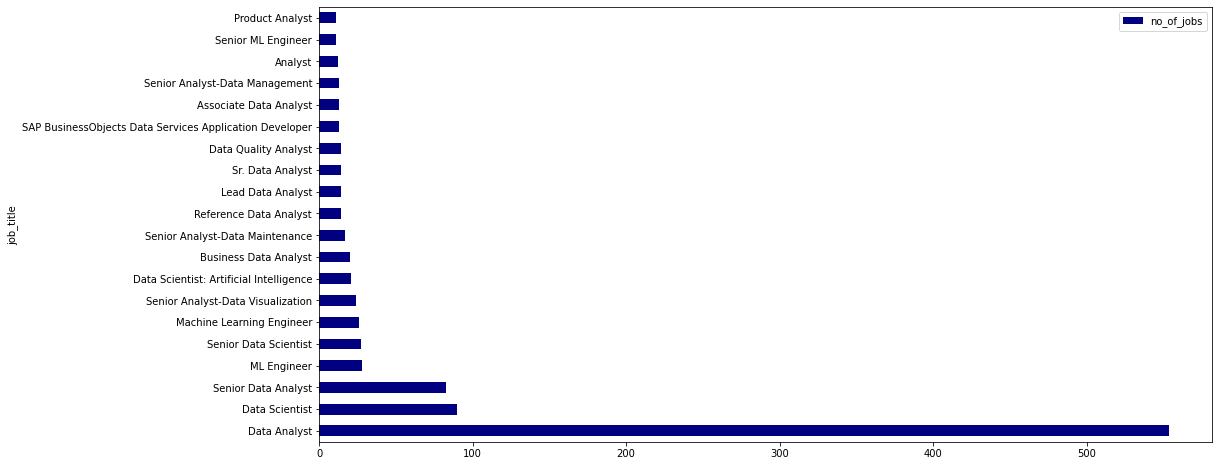

In [66]:

# plt.figure(figsize = (16,8))
final_df.groupby('job_title').count()[['company_name']].rename({'company_name' : 'no_of_jobs'}, axis =1)\
    .sort_values(by='no_of_jobs', ascending=False).head(20).plot(kind = 'barh', color = 'navy', figsize = (16,8))


### How many jobs actully mentions the words like: python, excel, etc

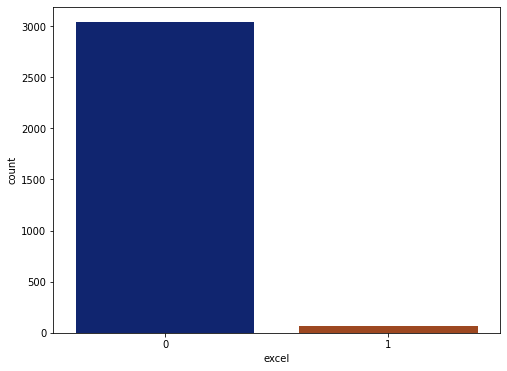

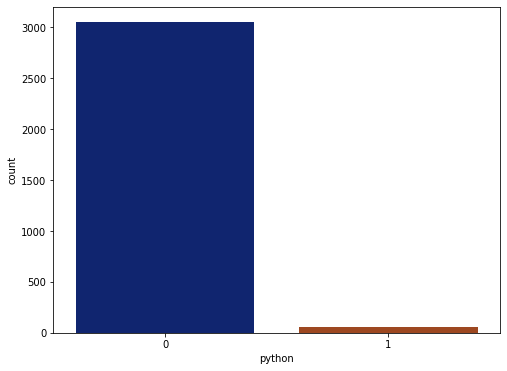

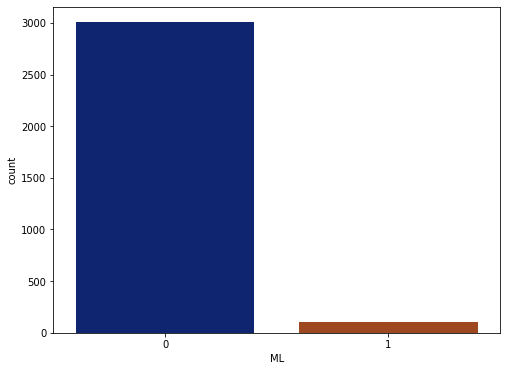

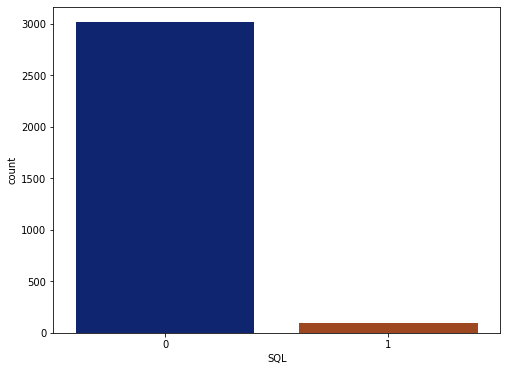

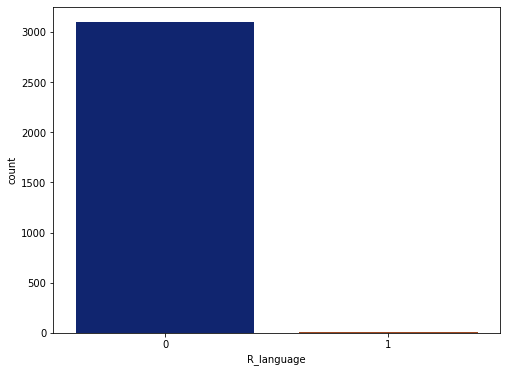

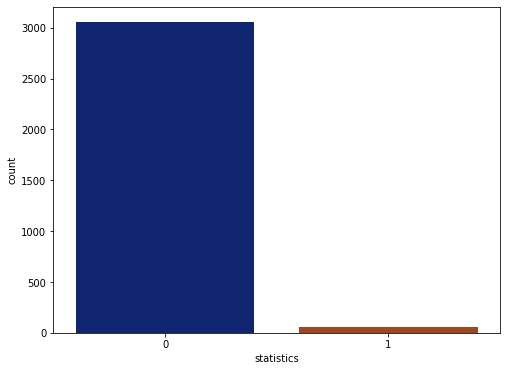

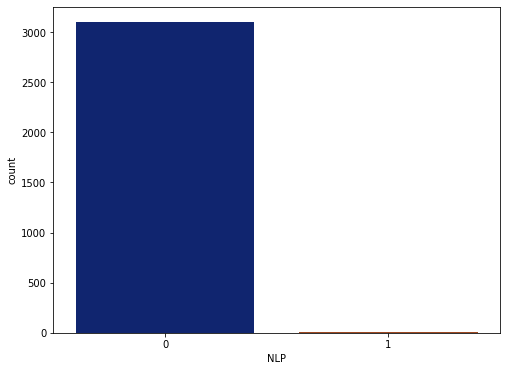

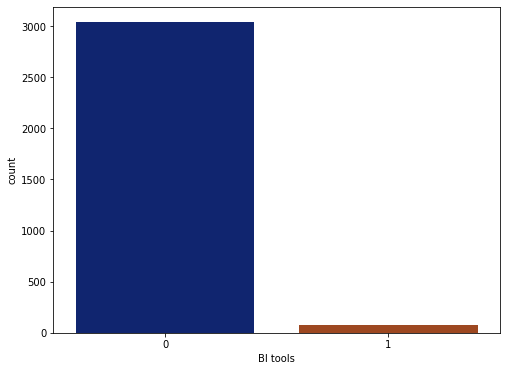

In [74]:
skills = ['excel', 'python','ML', 'SQL', 'R_language', 'statistics', 'NLP', 'BI tools']
for col in skills:
    plt.figure(figsize = (8,6))
    sns.countplot(x = col, data = final_df, palette = 'dark')
    plt.show()


## What does Job Description actually contains

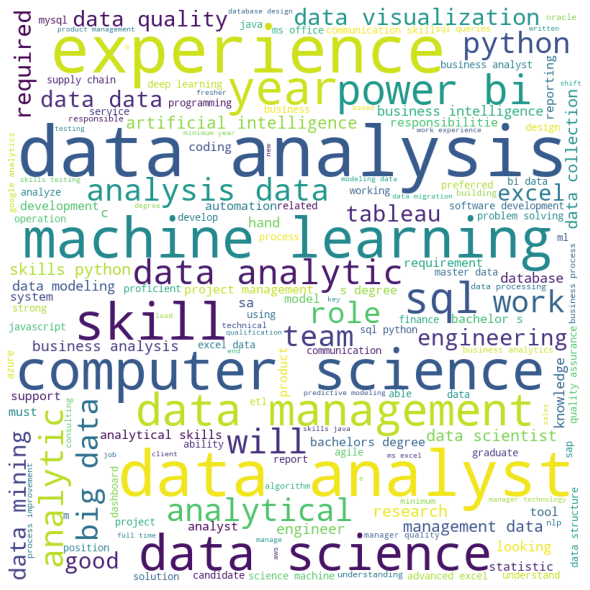

In [76]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
extra_word = set(['missing']) 

stopwords |= extra_word



for val in final_df.job_description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()